In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
import pandas as pd 

loan_approval = pd.read_excel(r"C:\Users\AkshitaKhajuria\Downloads\loan_approval_dataset.xlsx")

In [141]:
loan_approval.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,Credit_Score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [142]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [143]:
# Understanding the data 

loan_approval.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,Credit_Score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00
mean,2135.00,2.50,5059123.92,15133450.46,10.90,599.94,7472616.54,4973155.31,15126305.93,4976692.43
std,1232.50,1.70,2806839.83,9043362.98,5.71,172.43,6503636.59,4388966.09,9103753.67,3250185.31
min,1.00,0.00,200000.00,300000.00,2.00,300.00,-100000.00,0.00,300000.00,0.00
25%,1068.00,1.00,2700000.00,7700000.00,6.00,453.00,2200000.00,1300000.00,7500000.00,2300000.00
50%,2135.00,3.00,5100000.00,14500000.00,10.00,600.00,5600000.00,3700000.00,14600000.00,4600000.00
75%,3202.00,4.00,7500000.00,21500000.00,16.00,748.00,11300000.00,7600000.00,21700000.00,7100000.00
max,4269.00,5.00,9900000.00,39500000.00,20.00,900.00,29100000.00,19400000.00,39200000.00,14700000.00


- Income, loan, asset values are very large in comparision to others
- Residential asset value minimum is in negative which is suspecious : -100000.00
- loan_status is your binary classification target: "Approved" or "Rejected".

In [115]:
loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7   Credit_Score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


All rows have 4269 non-null entries- **No missing Values** 

In [119]:
loan_approval['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [117]:
print(loan_approval.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', 'Credit_Score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [144]:
#strip all leading/trailing spaces

loan_approval.columns = loan_approval.columns.str.strip()

In [145]:
loan_approval['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [122]:
loan_approval.duplicated().sum()

np.int64(0)

In [146]:
categorical_Col = [col for col in loan_approval.columns if loan_approval[col].dtype == 'O']

for col in categorical_Col:
    print(f'{col} : {loan_approval[col].unique()}')
                   

education : [' Graduate' ' Not Graduate']
self_employed : [' No' ' Yes']
loan_status : [' Approved' ' Rejected']


In [147]:
for col in categorical_Col:
    print(loan_approval[col].value_counts()/len(loan_approval)*100)
    print()

education
Graduate       50.22
Not Graduate   49.78
Name: count, dtype: float64

self_employed
Yes   50.36
No    49.64
Name: count, dtype: float64

loan_status
Approved   62.22
Rejected   37.78
Name: count, dtype: float64



So they are pretty balanced and good for analysis

### Exploratory Data Analysis

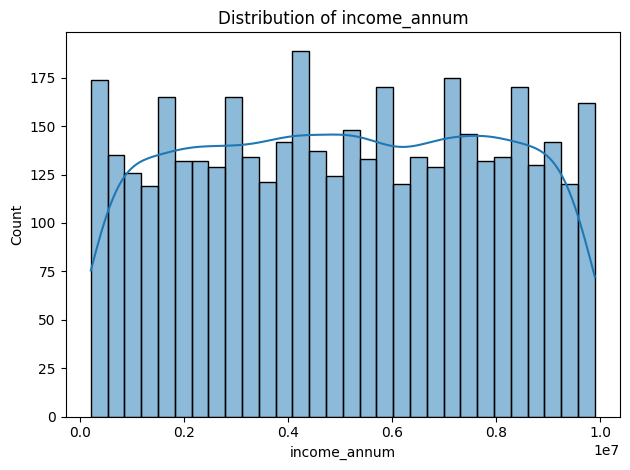

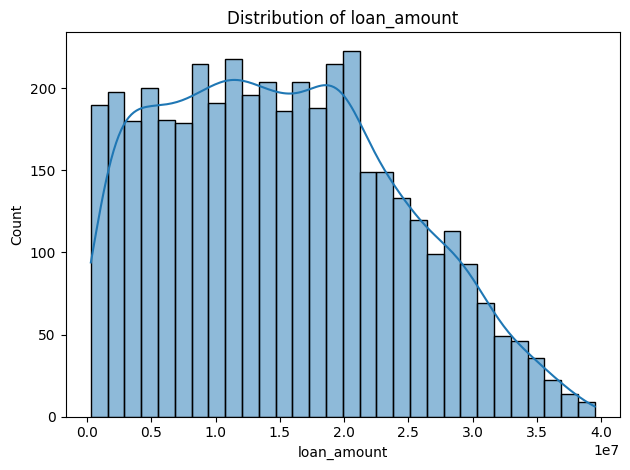

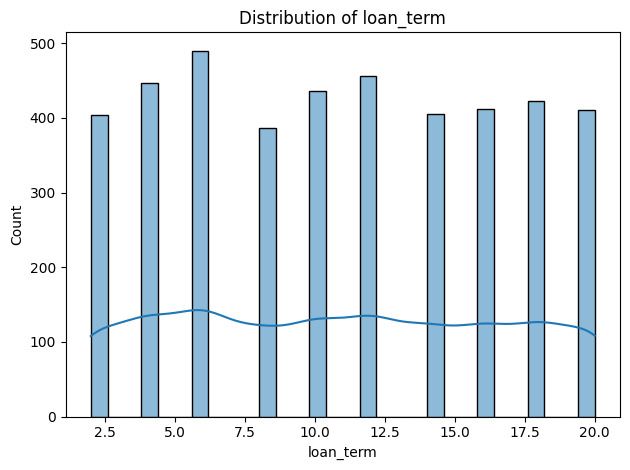

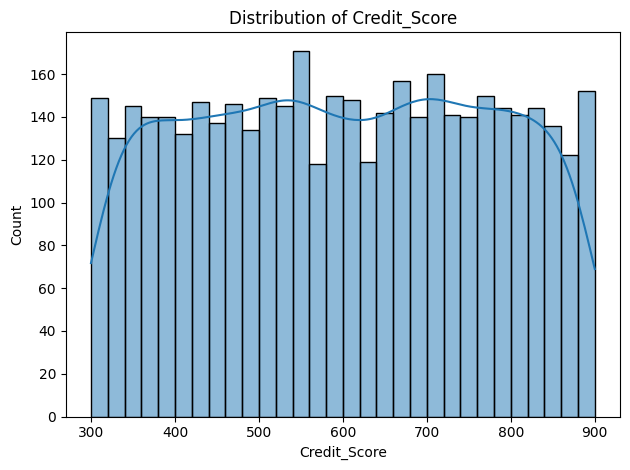

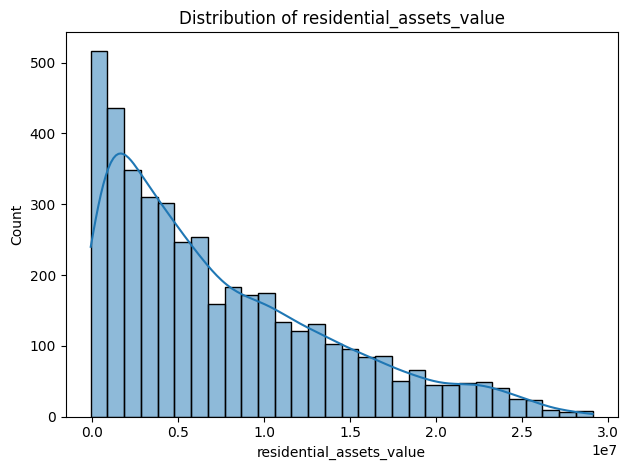

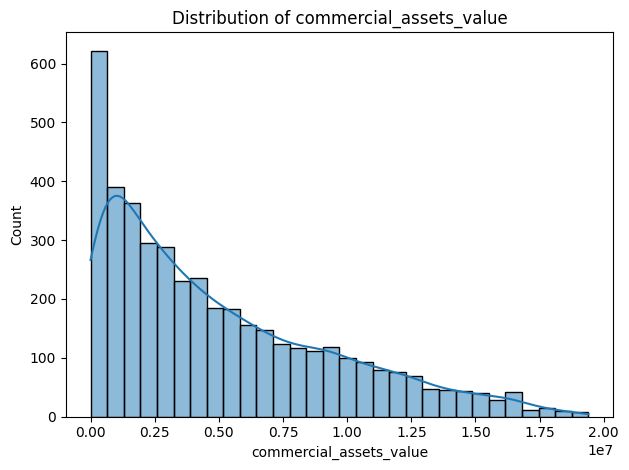

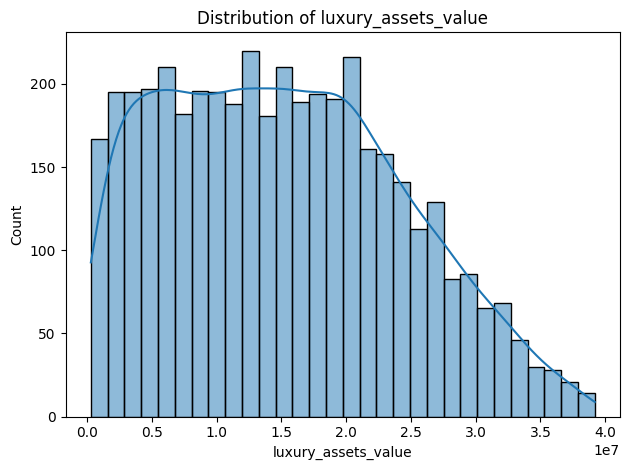

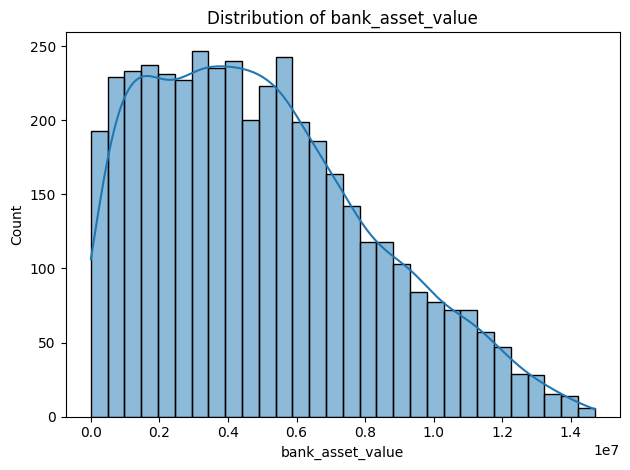

In [125]:
import matplotlib.pyplot as plt 
import seaborn as sns 

numerical_cols = [
    'income_annum', 'loan_amount', 'loan_term', 'Credit_Score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]

for col in numerical_cols:
    plt.figure()
    sns.histplot(loan_approval[col] , kde = True, bins =30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    

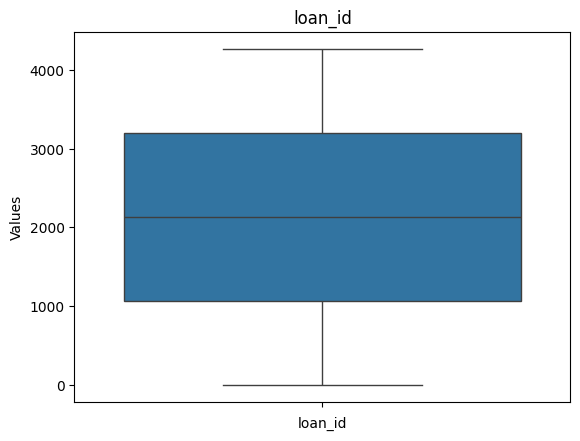

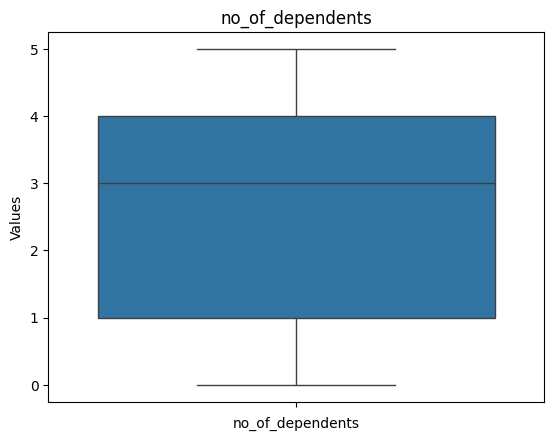

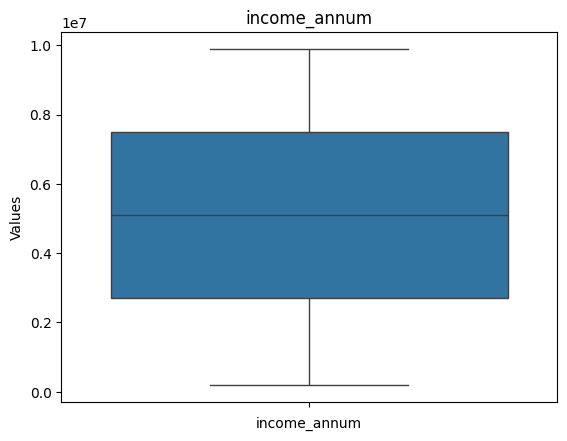

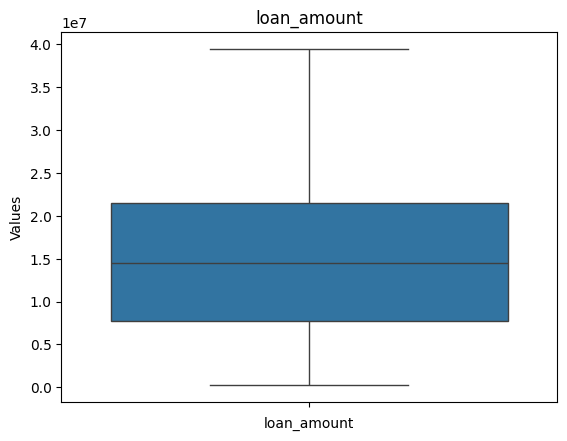

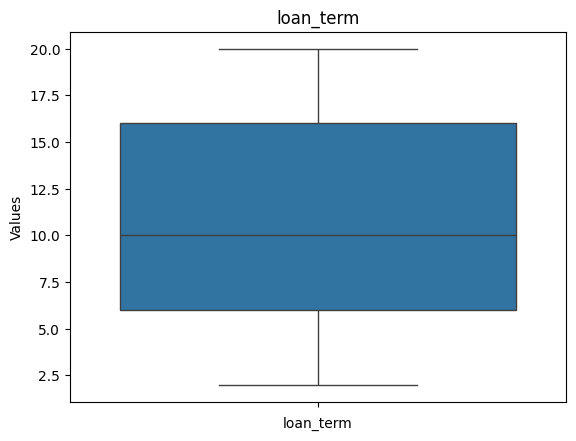

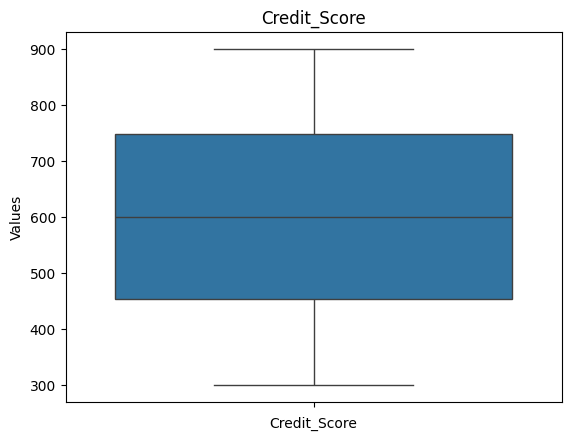

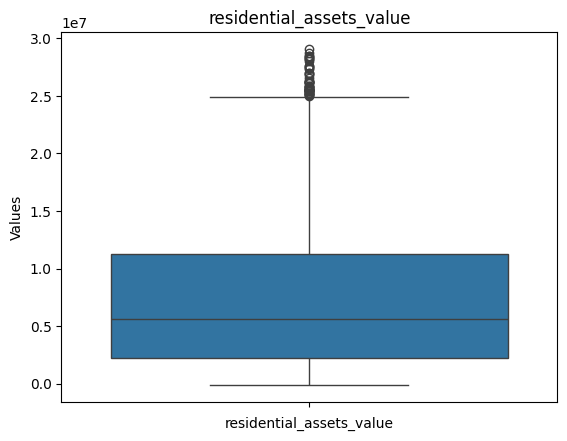

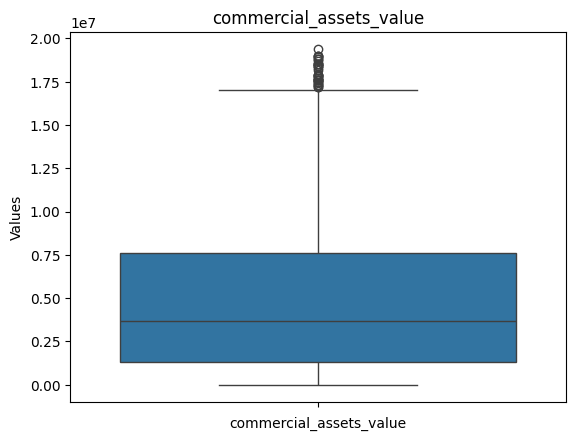

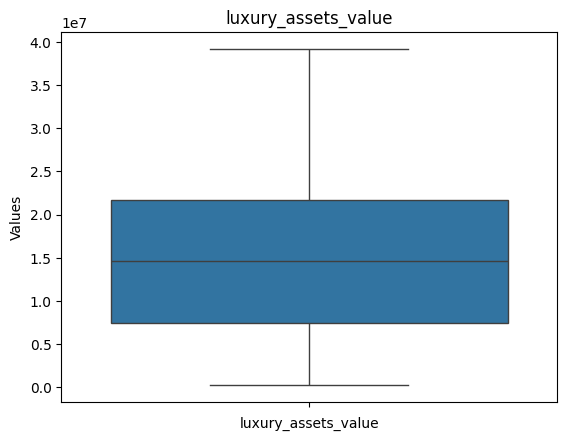

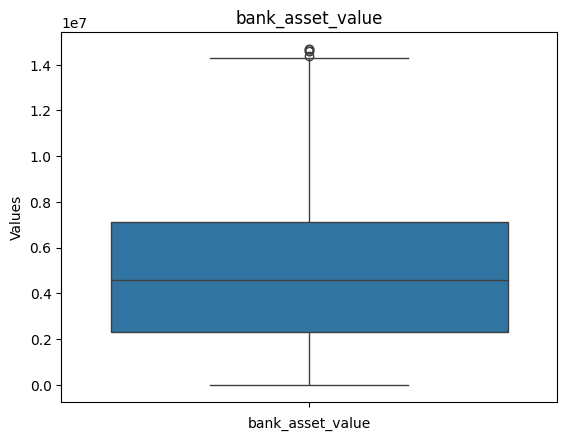

In [34]:
numerical_cols = loan_approval.select_dtypes(include = ['int64', 'float64']).columns

for col in numerical_cols:
    sns.boxplot(loan_approval[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

### Data Pre processing 



In [148]:
loan_approval = loan_approval.drop(columns = ['loan_id'])


In [149]:
from sklearn.preprocessing import LabelEncoder

# Copy original dataset
df = loan_approval.copy()

# Create SEPARATE label encoders for each column
le_education = LabelEncoder()
le_self_employed = LabelEncoder()
le_loan_status = LabelEncoder()

# Fit encoders ON STRING COLUMNS (not already encoded ones)
le_education.fit(df['education'])
le_self_employed.fit(df['self_employed'])
le_loan_status.fit(df['loan_status'])

# Now transform using the above
df['education'] = le_education.transform(df['education'])
df['self_employed'] = le_self_employed.transform(df['self_employed'])
df['loan_status'] = le_loan_status.transform(df['loan_status'])  # 0/1 now



In [150]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,Credit_Score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


<Axes: >

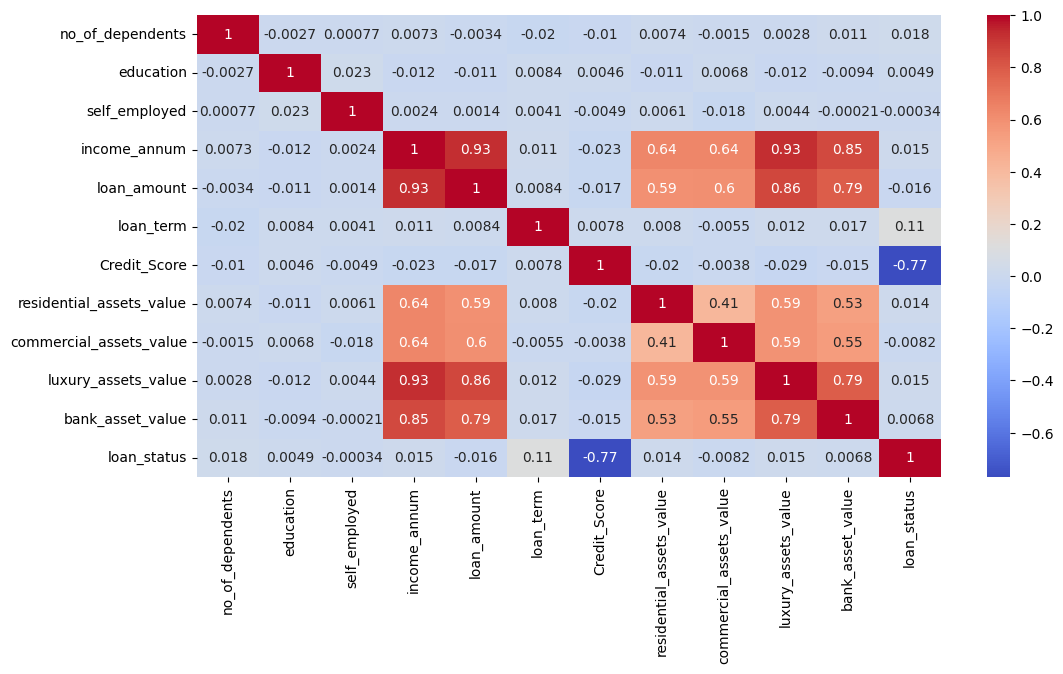

In [151]:
corr = df.corr()

plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True , cmap = 'coolwarm')

## Feature Engineering

Since income and loan are so correlated.. we can create them as 1 column by feature engineering debt to income ratio 


In [152]:
df['debt_to_income'] = df['loan_amount']/df['income_annum']

In [153]:
df= df.drop(columns = ['loan_amount' , 'income_annum'])

<Axes: >

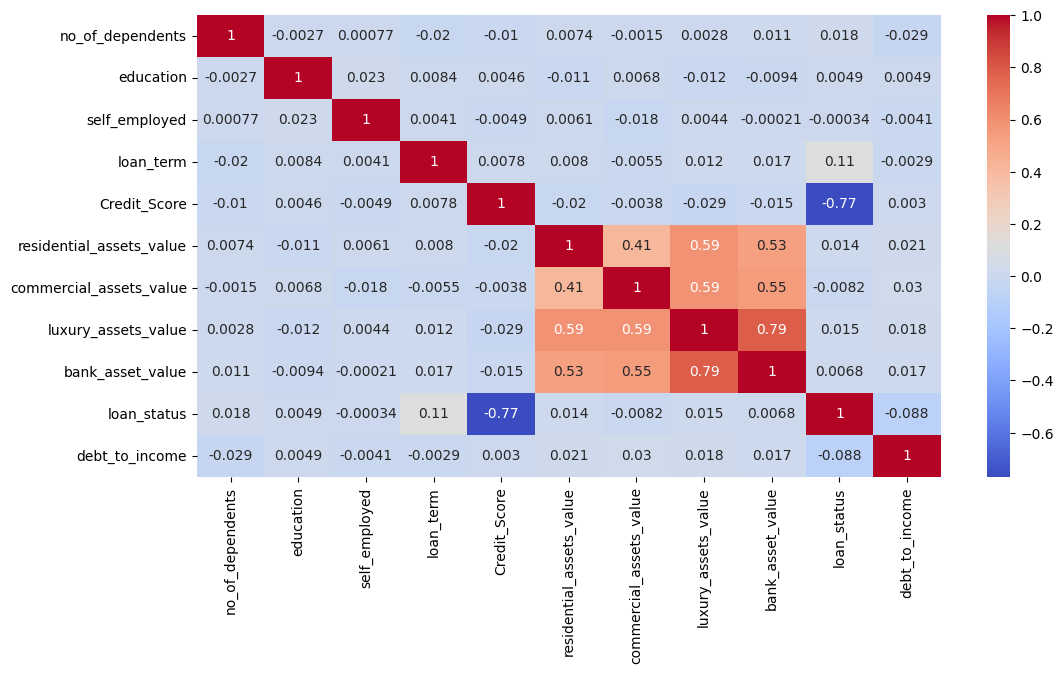

In [154]:
corr = df.corr()

plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [155]:
from sklearn.preprocessing import MinMaxScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('loan_status')
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [156]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# STEP 5: Train Multiple Models and Evaluate

 Cross-validation scores: [0.90629575 0.90775988 0.9238653  0.91654466 0.93850659]
 Mean CV Accuracy: 0.9186

 Test Accuracy: 0.8993


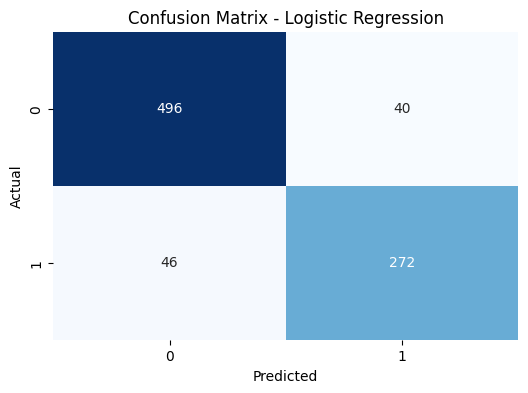

 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.87      0.86      0.86       318

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



In [157]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Initialize the model
log_model = LogisticRegression(max_iter=1000)

# Step 3: Cross-validation on training data
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
print(" Cross-validation scores:", cv_scores)
print(" Mean CV Accuracy:", round(cv_scores.mean(), 4))
print()

# Step 4: Train model on full training data
log_model.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = log_model.predict(X_test)

# Step 6: Test accuracy
print(" Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Step 8: Classification report
print(" Classification Report:\n")
print(classification_report(y_test, y_pred))


 Decision Tree - Cross-validation scores: [0.9897511  0.98828697 0.9897511  0.99267936 0.99707174]
 Mean CV Accuracy: 0.9915

 Decision Tree - Test Accuracy: 0.9977


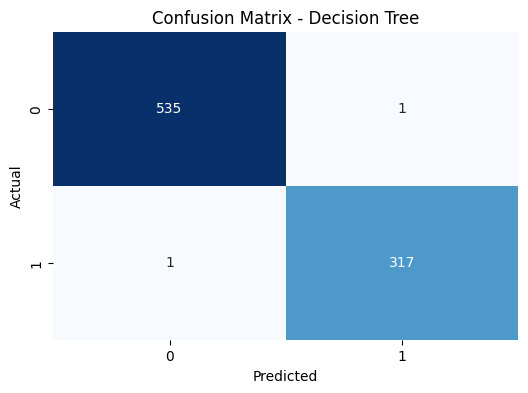

 Decision Tree - Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [59]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt_model = DecisionTreeClassifier(random_state=42)

# Cross-validation on training data
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(" Decision Tree - Cross-validation scores:", cv_scores_dt)
print(" Mean CV Accuracy:", round(cv_scores_dt.mean(), 4))
print()

# Train model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Test Accuracy
print(" Decision Tree - Test Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Classification Report
print(" Decision Tree - Classification Report:\n")
print(classification_report(y_test, y_pred_dt))


 Random Forest - Cross-validation scores: [0.99560761 0.99560761 0.99560761 0.99560761 0.99707174]
 Mean CV Accuracy: 0.9959

 Random Forest - Test Accuracy: 0.9988


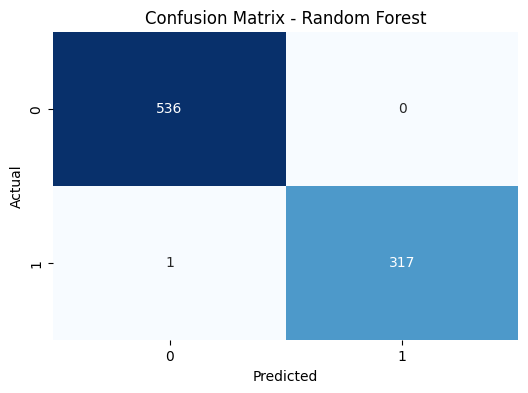

 Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [158]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation on training data
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(" Random Forest - Cross-validation scores:", cv_scores_rf)
print(" Mean CV Accuracy:", round(cv_scores_rf.mean(), 4))
print()

# Train model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Test Accuracy
print(" Random Forest - Test Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification Report
print(" Random Forest - Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


C:\Users\AkshitaKhajuria\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\AkshitaKhajuria\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\AkshitaKhajuria\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\AkshitaKhajuria\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: U

 XGBoost - Cross-validation scores: [0.99414348 0.99414348 0.99560761 0.99560761 0.99707174]
 Mean CV Accuracy: 0.9953

 XGBoost - Test Accuracy: 0.993


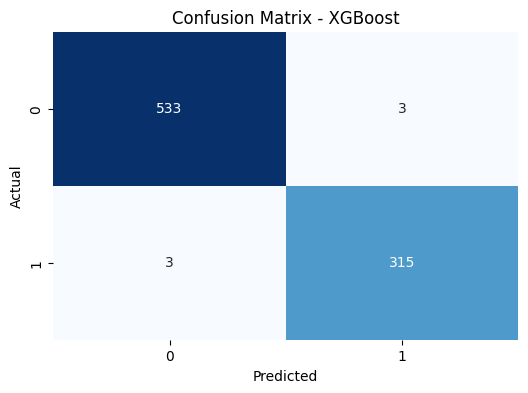

 XGBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.99      0.99      0.99       318

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [63]:
# XGBoost Classifier

from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation on training data
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print(" XGBoost - Cross-validation scores:", cv_scores_xgb)
print(" Mean CV Accuracy:", round(cv_scores_xgb.mean(), 4))
print()

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Test Accuracy
print(" XGBoost - Test Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Classification Report
print(" XGBoost - Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))


## Which model performed better? 

So we started with logistic regression which showed the lowest results with 89% accuracy 

Decision tree was second last  with 99.7% accuracy 

Surprisingly XGBoost didnt perform that well with 3 false positives and 3 false negatives. 

The best model here was **Random Forest** which 99.8% accuracy with precision score of 1 showing hiest precision and just one false negative. 

## SHAP values for Random Forest

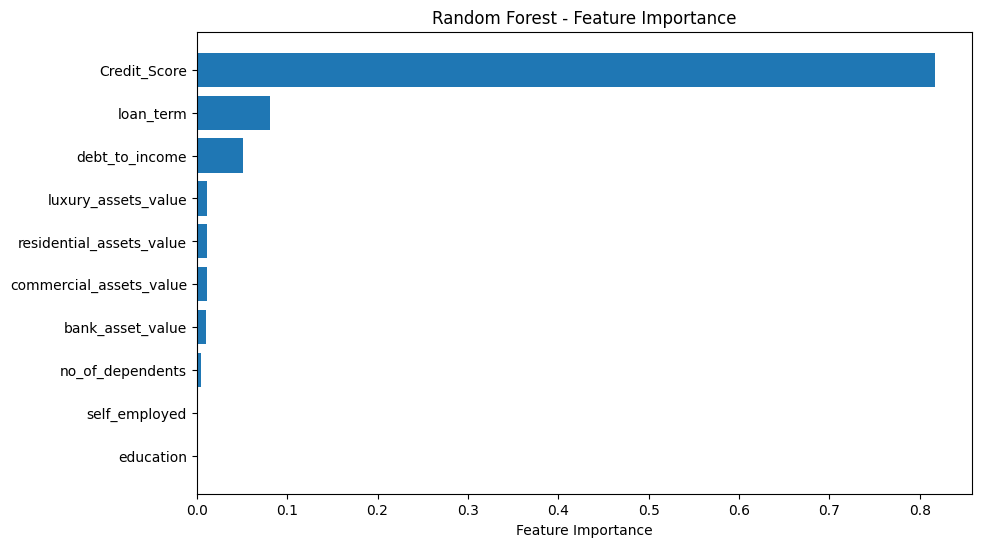

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy viewing
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()
plt.show()





In [164]:
input_df.head()

,income,loan_amount,term,credit_score,education,self_employed
0,60000,250,360,720,Graduate,No
